<a href="https://colab.research.google.com/github/SeunghyeChae/tmdhey/blob/main/Deeplearning_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 딥러닝 구조 및 학습

* 딥러닝 구조와 학습에 필요한 요소
  - **모델(네트워크)**를 구성하는 **레이어(layer)**
  - **입력 데이터**와 그에 대한 **목적(결과)**
  - 학습시에 사용할 피드백을 정의하는 **손실함수(loss function)**
  - 학습 진행 방식을 결정하는 **옵티마이저(optimizer)**
  

# 레이어 (layer)

- 신경망의 핵심 데이터 구조
- 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈
- 상태가 없는 레이어도 있지만, 대부분 가중치(weight) 레이어 상태를 가짐 
- 가중치는 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서

* Keras에서 사용되는 주요 레이어
  - Dense
  - Activation
  - Flatten
  - Input


In [2]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Input

# Dense

- 완전연결계층(Fully-Connected Layer) ; 모든 노드가 서로 연결되어있는 상태
- 노드수(유닛수), 활성화함수(activation)등을 지정
- name으로 레이어간 구분 가능
- 가중치 초기화 (kernel_initializer)
  - 신경망의 성능에 큰 영향을 줌
  - 보통 가중치의 초기값으로 0에 가까운 무작위 값 사용
  - 동일 학습데이터로 학습시키더라도, 가중치 초기값에 따라 학습된 신경망에 성능차이가 나타날 수 있음
  - 오차역전파 알고리즘은 기본적으로 경사하강법을 사용하기 때문에 최적해가 아닌 지역해에 빠질 가능성이 있음 : 초기값이 중요하다~
  

In [3]:
Dense(10, activation='softmax')   #유닛수, activation

In [4]:
Dense(10, activation='relu', name= 'Dense Layer') 

In [5]:
Dense(10, kernel_initializer='he_normal', name= 'Dense Layer') 

# Activation 

- Dense layer에서 미리 활성화 함수를 지정할 수도 있지만, 필요에 따라 별도 레이어를 만들어줄 수 있음

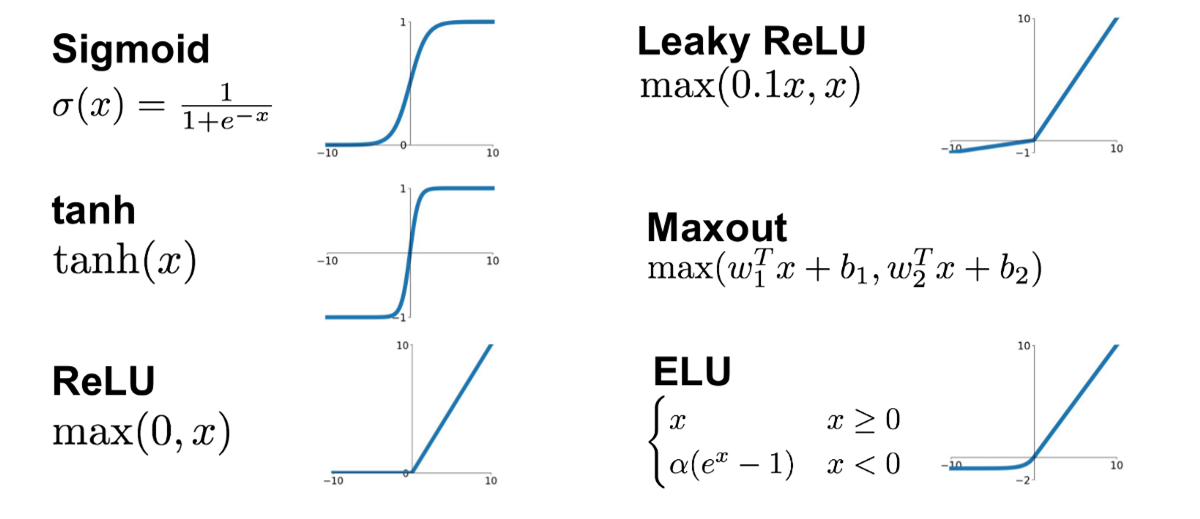

In [7]:
dense = Dense(10, activation='relu', name= 'Dense Layer') #1

Activation(dense) #2


# Flatten

- 배치크기(또는 데이터 크기)를 제외하고 데이터를 1차원으로 쭉 펼치는 작업
- ex. (128,3,2,2) -> (128,12)

In [8]:
Flatten(input_shape=(128,3,2,2))

# Input

- 모델의 입력을 정의
- shape, dtype 포함
- 하나의 모델은 여러개의 입력을 가질 수 있음
- summary() method를 통해서는 보이지 않음

In [10]:
import tensorflow as tf

Input(shape=(28,28), dtype=tf.float32)

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_1')>

In [11]:
Input(shape=(8,), dtype=tf.int32)

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_2')>

# 모델(Model)
- 딥러닝 모델은 레이어로 만들어진 비순환 유향 그래프(Direct Acyclic Graph, DAG) 구조


# 모델 구성
 1. Sequential()
 2. 서브클래싱(Subclassing)
 3. 함수형 API

# Sequential()
- 모델이 순차적인 구조로 진행할 때 사용
- 간단한 방법 
  - Sequential 객체 생성 후, add()를 이용한 방법
  - Sequential 인자에 한번에 추가 방법
- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음

In [12]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model


In [14]:
model= Sequential()
model.add(Input(shape=(28,28)))
model.add(Dense(300, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 28, 300)           8700      
                                                                 
 dense_5 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_6 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


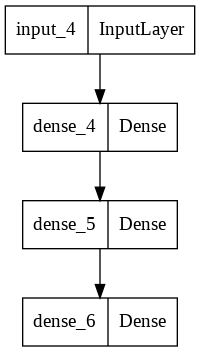

In [15]:
plot_model(model)

In [17]:
model= Sequential([Input(shape=(28,28),name='Input'),
                   Dense(300, activation = 'relu', name='Dense1'),
                   Dense(100, activation = 'relu', name='Dense2'),
                   Dense(10, activation = 'softmax', name='Output')])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 28, 300)           8700      
                                                                 
 Dense2 (Dense)              (None, 28, 100)           30100     
                                                                 
 Output (Dense)              (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


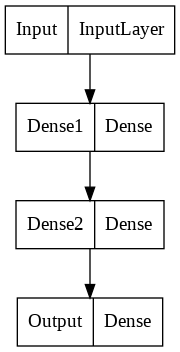

In [18]:
plot_model(model)

# 함수형 API (good)
- 모델을 복잡하고 유연하게 구성 가능
- 다중 입출력을 다룰 수 있음

In [20]:
inputs = Input(shape=(28,28,1))
x= Flatten(input_shape=(28,28,1))(inputs)
x= Dense(300, activation='relu')(x)
x= Dense(100, activation='relu')(x)
x= Dense(10, activation='softmax')(x)

model= Model(inputs=inputs, outputs=x)
model.summary() # 단일입력 단일출력 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


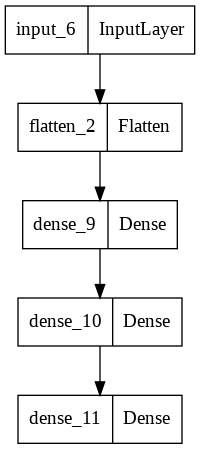

In [21]:
plot_model(model) # 단일입력 단일출력 

In [23]:
from tensorflow.keras.layers import Concatenate 

input_layer= Input(shape=(28,28))
hidden1= Dense(100, activation= 'relu')(input_layer)
hidden2= Dense(30, activation= 'relu')(hidden1)
concat= Concatenate()([input_layer, hidden2])
output= Dense(1)(concat) #dense layer로 unit 1개만 hidden1,2 concat된걸로

model= Model(inputs=[input_layer], outputs=[output])
model.summary() # dense층 concat

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 dense_14 (Dense)               (None, 28, 100)      2900        ['input_8[0][0]']                
                                                                                                  
 dense_15 (Dense)               (None, 28, 30)       3030        ['dense_14[0][0]']               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 28, 58)       0           ['input_8[0][0]',                
                                                                  'dense_15[0][0]']         

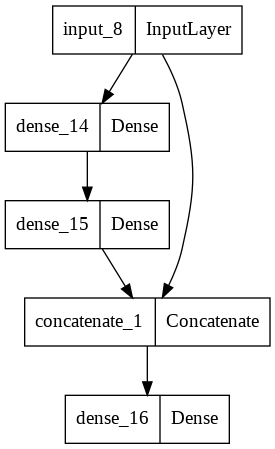

In [24]:
plot_model(model) # dense층 concat

In [28]:
input_1= Input(shape=(10,10), name='Input_1') #input1
input_2= Input(shape=(10,28), name='Input_2') #input2


hidden1= Dense(100, activation='relu')(input_2) #input2연결 
hidden2= Dense(10, activation= 'relu')(hidden1) #hidden1이랑 연결
concat= Concatenate()([input_1, hidden2]) # hidden2랑 input1과 연결 
output= Dense(1, activation= 'sigmoid', name= 'output')(concat)

model= Model(inputs=[input_1,input_2], outputs=[output])
model.summary() # 다중입력 단일출력

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_21 (Dense)               (None, 10, 100)      2900        ['Input_2[0][0]']                
                                                                                                  
 Input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_22 (Dense)               (None, 10, 10)       1010        ['dense_21[0][0]']               
                                                                                            

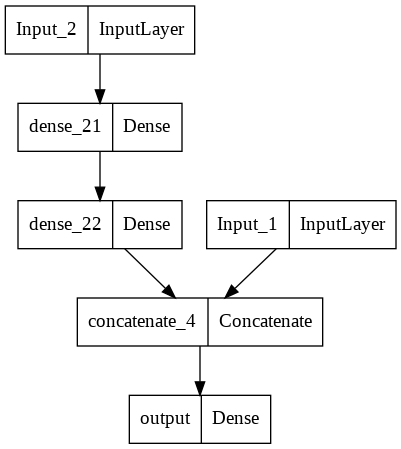

In [29]:
plot_model(model) # 다중입력 단일출력

In [31]:
input_ = Input(shape=(10,10), name='input_')
hidden1= Dense(100, activation='relu')(input_)
hidden2= Dense(10, activation='relu')(hidden1)
output= Dense(1, activation= 'sigmoid', name='main_output')(hidden2)
sub_out= Dense(1, name='sum_output')(hidden2)

model= Model(inputs=[input_], outputs=[output,sub_out])
model.summary() # 단일입력 다중출력

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ (InputLayer)            [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_24 (Dense)               (None, 10, 100)      1100        ['input_[0][0]']                 
                                                                                                  
 dense_25 (Dense)               (None, 10, 10)       1010        ['dense_24[0][0]']               
                                                                                                  
 main_output (Dense)            (None, 10, 1)        11          ['dense_25[0][0]']               
                                                                                            

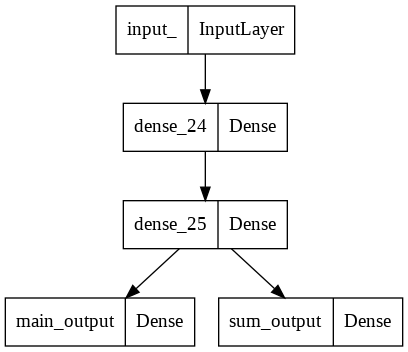

In [32]:
plot_model(model) # 단일입력 다중출력

In [34]:
input_1 = Input(shape=(10,10), name='input_1')
input_2 = Input(shape=(10,28), name='input_')

hidden1= Dense(100, activation='relu')(input_2)
hidden2= Dense(10, activation='relu')(hidden1)

concat= Concatenate()([input_1, hidden2])

output= Dense(1, activation= 'sigmoid', name='main_output')(concat) # concat output
sub_out= Dense(1, name='sum_output')(hidden2) # hidden2 output

model= Model(inputs=[input_1,input_2], outputs=[output,sub_out])
model.summary() # 다중입력 다중출력

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ (InputLayer)            [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_28 (Dense)               (None, 10, 100)      2900        ['input_[0][0]']                 
                                                                                                  
 input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_29 (Dense)               (None, 10, 10)       1010        ['dense_28[0][0]']               
                                                                                            

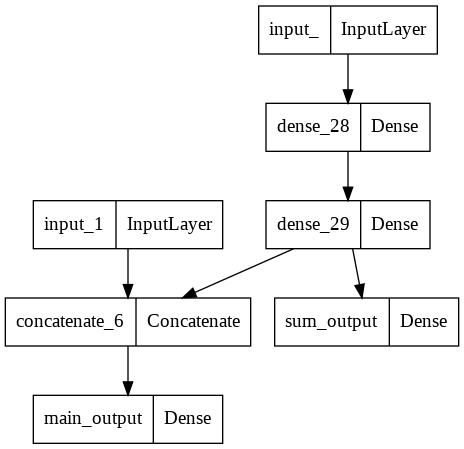

In [35]:
plot_model(model)  # 다중입력 다중출력